<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Breast_cancer_data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# Drop the 'Unnamed: 32' column
df = df.drop(columns=['Unnamed: 32'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert the 'diagnosis' column to a binary variable (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
 [[67  4]
 [ 3 40]]


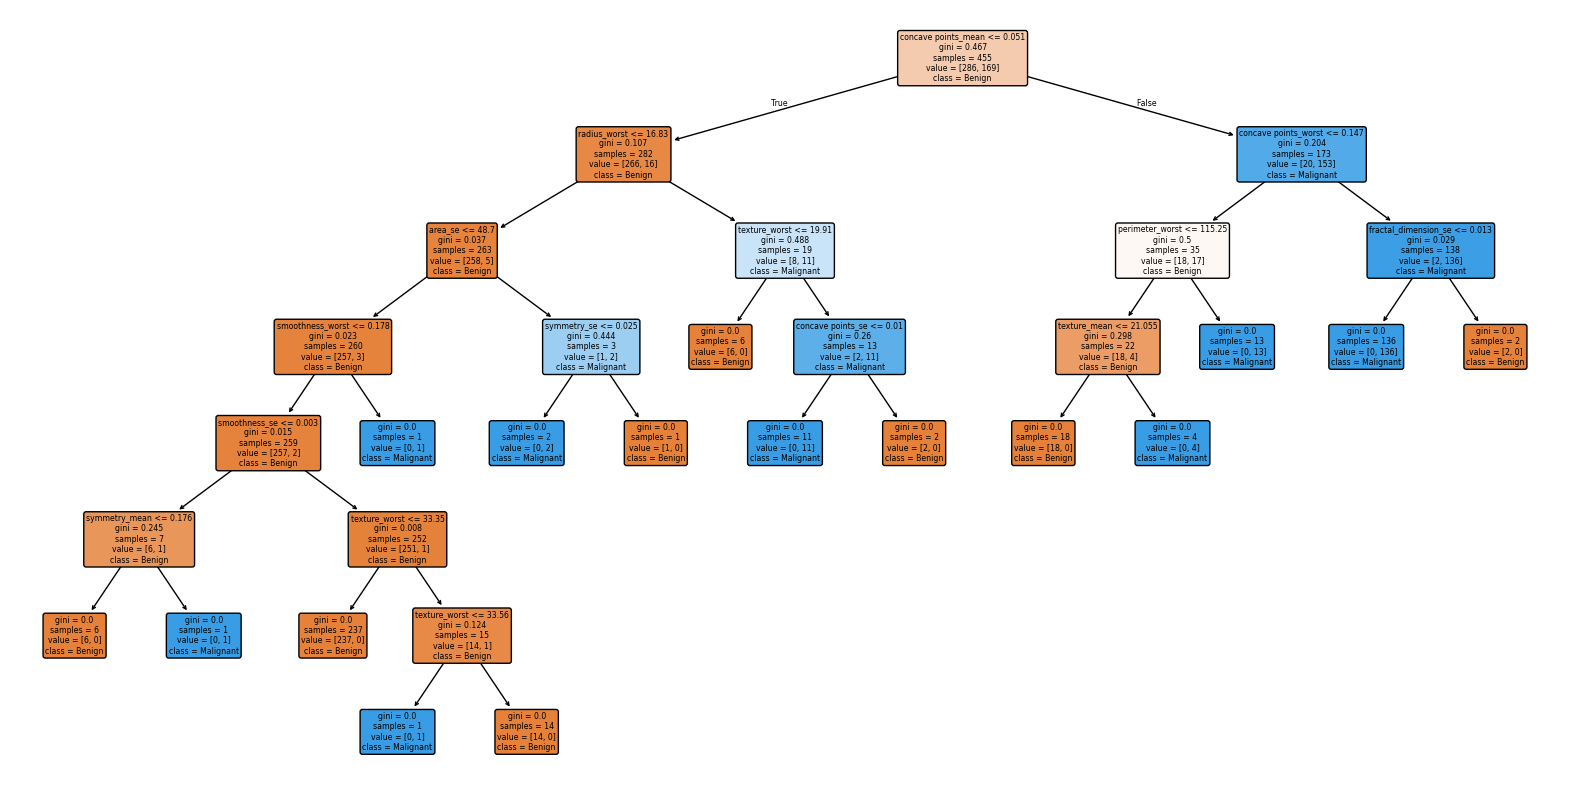

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Optionally, visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 4 39]]


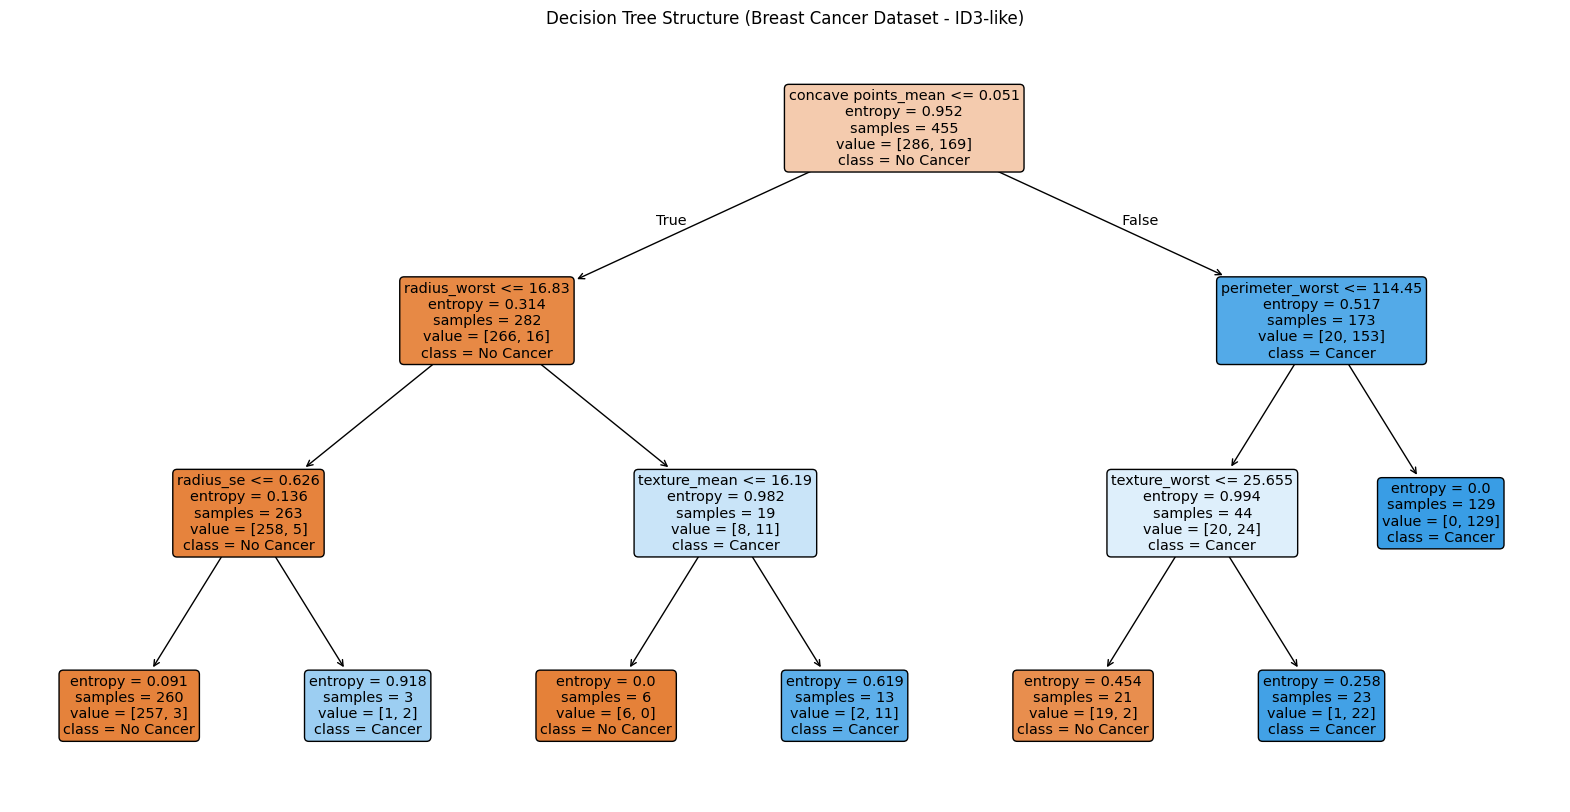

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (assumed to be breast cancer dataset or any other dataset)
# Replace '/path_to_your_dataset.csv' with the actual file path
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Breast_cancer_data.csv")

# For example, let's say we are using the breast cancer dataset
# Convert the 'diagnosis' column to a binary variable (M=1, B=0) if it's not done already
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Features (everything except 'diagnosis')
y = df['diagnosis']  # Target ('diagnosis')

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model (using 'entropy' for Information Gain, similar to ID3)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')

# Train the model
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=['No Cancer', 'Cancer'], filled=True, rounded=True)
plt.title("Decision Tree Structure (Breast Cancer Dataset - ID3-like)")
plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Preprocess the data (assume we have 'diagnosis' column as target and other features)
# Convert the 'diagnosis' column to binary (M=1, B=0) if not already done
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVMs, as they are sensitive to the scale of the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier (SVM)
svm_clf = SVC(kernel='linear', random_state=42)  # You can try different kernels: 'linear', 'rbf', 'poly'

# Train the model
svm_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[68  3]
 [ 2 41]]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature scaling (important for KNN, as KNN is sensitive to the scale of the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier (using default k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_clf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[68  3]
 [ 3 40]]
